In [5]:
!pip install python-docx

  Using cached python-docx-0.8.11.tar.gz (5.6 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for python-docx: filename=python_docx-0.8.11-py3-none-any.whl size=184519 sha256=a805c89e3d6669399dcbebefdf25bb77fa1669a4eb99d88a4995acd1ec9b2844
  Stored in directory: c:\users\krg\appdata\local\pip\cache\wheels\65\e1\9b\0c38fe6cfe02a9fe31cb6b4efd90985f17354d7f77872f2def
Successfully built python-docx


In [1]:
import csv
import pandas as pd

data_book = pd.read_csv('train_cniot_book.csv', header=None, names=['data'])
data_book


,data
0,The th century was the era of the great mecha...
1,The th century was the age of the steam engine
2,During the th century the key technology was...
3,Among other developments we saw the installat...
4,As a result of rapid technological progress t...
...,...
21646,The program should take plaintext from the sta...
21647,The encryption should be carried out character...
21648,For this problem you are allowed to select an...
21649,You may select any output format as long as i...


In [2]:
import gensim
from nltk.stem import WordNetLemmatizer
# nltk.download('omw-1.4')
def ls(text):
    return WordNetLemmatizer().lemmatize(text, pos='v')


# Tokenize and lemmatize
def pp(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS:   # for dbms  and len(token) > 3
            result.append(ls(token))

    return result

# print("\n")
prepro_data = []
for index,line in data_book.iterrows():
    prepro_data.append(pp(line['data']))

if __name__ == "__main__":
    print(prepro_data)

[['th', 'century', 'era', 'great', 'mechanical', 'systems', 'accompany', 'industrial', 'revolution'], ['th', 'century', 'age', 'steam', 'engine'], ['th', 'century', 'key', 'technology', 'information', 'gather', 'process', 'distribution'], ['developments', 'saw', 'installation', 'worldwide', 'telephone', 'network', 'invention', 'radio', 'television', 'birth', 'unprecedented', 'growth', 'industry', 'launch', 'communication', 'satellite', 'course', 'internet'], ['result', 'rapid', 'technological', 'progress', 'areas', 'rapidly', 'converge', 'st', 'century', 'differences', 'collect', 'transport', 'store', 'process', 'information', 'quickly', 'disappear'], ['organizations', 'hundreds', 'offices', 'spread', 'wide', 'geographical', 'area', 'routinely', 'expect', 'able', 'examine', 'current', 'status', 'remote', 'outpost', 'push', 'button'], ['ability', 'gather', 'process', 'distribute', 'information', 'grow', 'demand', 'sophisticate', 'information', 'process', 'grow', 'faster'], ['industry', 

In [31]:
import gensim
from gensim import corpora

dict_ = corpora.Dictionary(prepro_data)

print(type(dict_))

# for i,j in dict_.items():
#     print(i, " ", j)
#
#
doc_term_matrix = [dict_.doc2bow(i) for i in prepro_data]
# print(doc_term_matrix)
#
Lda = gensim.models.ldamodel.LdaModel

ldamodel = Lda(doc_term_matrix, num_topics = 100, id2word = dict_, passes=1, random_state=0, eval_every=None)

print(ldamodel.print_topics())

for i in ldamodel.print_topics(num_topics=len(prepro_data), num_words=5):
    print(i)

# count = 0
# for i in ldamodel[doc_term_matrix]:
#     print("doc : ",count,i)
#     count += 1

# lda_model =  gensim.models.LdaMulticore(doc_term_matrix, num_topics = 8, id2word = dict_, passes = 10, workers = 2)
# print(lda_model.print_topic())

topicwise_words = []
topics = ldamodel.show_topics(formatted=False)

for i in range(len(topics)):
    topic_words = dict(topics[i][1])
    word = []
    for ky in topic_words:
        word.append(ky)
    topicwise_words.append(word)

print(topicwise_words)

<class 'gensim.corpora.dictionary.Dictionary'>
[(70, '0.197*"file" + 0.152*"email" + 0.105*"establish" + 0.103*"line" + 0.078*"transfer" + 0.073*"method" + 0.041*"connection" + 0.031*"send" + 0.020*"lot" + 0.017*"typical"'), (14, '0.322*"fig" + 0.190*"show" + 0.129*"media" + 0.122*"form" + 0.082*"group" + 0.024*"expire" + 0.024*"eventually" + 0.014*"send" + 0.013*"presence" + 0.010*"convenient"'), (73, '0.194*"possible" + 0.150*"encode" + 0.109*"performance" + 0.063*"local" + 0.057*"color" + 0.057*"identifier" + 0.044*"repeat" + 0.039*"cod" + 0.028*"errors" + 0.023*"lookup"'), (77, '0.169*"certificate" + 0.144*"sign" + 0.105*"idea" + 0.078*"years" + 0.071*"distribute" + 0.053*"load" + 0.033*"basic" + 0.027*"active" + 0.022*"previously" + 0.022*"browse"'), (53, '0.160*"node" + 0.128*"image" + 0.103*"version" + 0.095*"communication" + 0.050*"major" + 0.047*"specific" + 0.045*"future" + 0.043*"completely" + 0.039*"grow" + 0.035*"subject"'), (19, '0.193*"video" + 0.184*"set" + 0.133*"audio

In [32]:
for word in dict_.items():
    print(word)

(0, 'accompany')
(1, 'century')
(2, 'era')
(3, 'great')
(4, 'industrial')
(5, 'mechanical')
(6, 'revolution')
(7, 'systems')
(8, 'th')
(9, 'age')
(10, 'engine')
(11, 'steam')
(12, 'distribution')
(13, 'gather')
(14, 'information')
(15, 'key')
(16, 'process')
(17, 'technology')
(18, 'birth')
(19, 'communication')
(20, 'course')
(21, 'developments')
(22, 'growth')
(23, 'industry')
(24, 'installation')
(25, 'internet')
(26, 'invention')
(27, 'launch')
(28, 'network')
(29, 'radio')
(30, 'satellite')
(31, 'saw')
(32, 'telephone')
(33, 'television')
(34, 'unprecedented')
(35, 'worldwide')
(36, 'areas')
(37, 'collect')
(38, 'converge')
(39, 'differences')
(40, 'disappear')
(41, 'progress')
(42, 'quickly')
(43, 'rapid')
(44, 'rapidly')
(45, 'result')
(46, 'st')
(47, 'store')
(48, 'technological')
(49, 'transport')
(50, 'able')
(51, 'area')
(52, 'button')
(53, 'current')
(54, 'examine')
(55, 'expect')
(56, 'geographical')
(57, 'hundreds')
(58, 'offices')
(59, 'organizations')
(60, 'outpost')
(6

In [33]:
from gensim.models.coherencemodel import CoherenceModel

coherence_model_lda = CoherenceModel(model=ldamodel, texts=topicwise_words, dictionary=dict_, coherence='u_mass')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  -2.3450868071558157


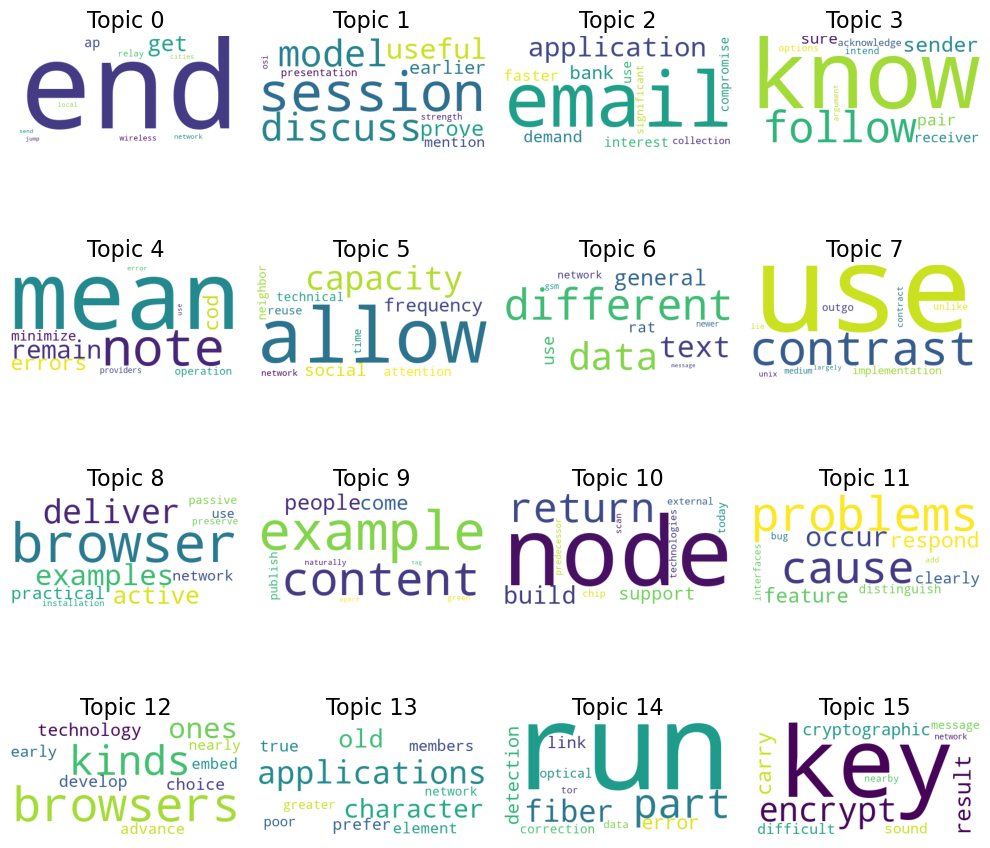

In [70]:

from matplotlib import pyplot as plt
from wordcloud import WordCloud
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(background_color="white",mask=None, max_words=10,\
                        max_font_size=60,min_font_size=10,prefer_horizontal=0.9,
                        contour_width=3,contour_color='black')

topics = ldamodel.show_topics(formatted=False,num_topics = 100)
# print(topics)
fig, axes = plt.subplots(4,4, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
#     print(topic_words)
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()


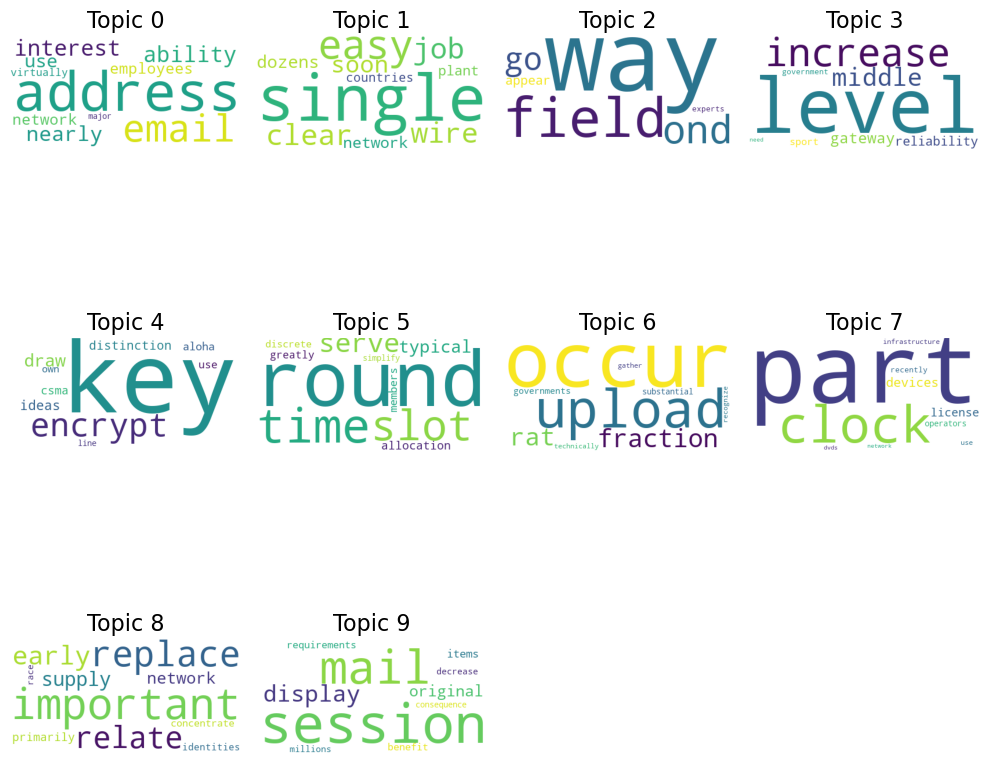

In [63]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

cloud = WordCloud(
    background_color="white",
    mask=None,
    max_words=10,
    max_font_size=60,
    min_font_size=10,
    prefer_horizontal=0.9,
    contour_width=3,
    contour_color='black'
)

topics = ldamodel.show_topics(formatted=False, num_topics=100)

num_topics = len(topics)
num_rows = num_topics // 4 + 1  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, 4, figsize=(10, 10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    if i < num_topics:  # Check if there are still topics to plot
        fig.add_subplot(ax)
        topic_words = dict(topics[i][1])
        cloud.generate_from_frequencies(topic_words, max_font_size=300)
        plt.gca().imshow(cloud)
        plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
        plt.gca().axis('off')
    else:
        fig.delaxes(ax)  # Remove empty subplots if there are extra

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()


In [66]:
import gensim
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

dict_ = corpora.Dictionary(prepro_data)

doc_term_matrix = [dict_.doc2bow(i) for i in prepro_data]
# print(doc_term_matrix)
co_val=[]
Lda = gensim.models.ldamodel.LdaModel
for j in range(100,130):
    print(j)
    ldamodel = Lda(doc_term_matrix, num_topics=j, id2word = dict_, passes=1, random_state=0, eval_every=None)
    for k in ldamodel.print_topics(num_topics=len(prepro_data), num_words=10):
        print(k)
    topicwise_words = []
    topics = ldamodel.show_topics(formatted=False)
#     print(topics)
    for i in range(len(topics)):
        topic_words = dict(topics[i][1])
        word = []
        for ky in topic_words:
            word.append(ky)
        topicwise_words.append(word)

    # print(topicwise_words)
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=topicwise_words, dictionary=dict_, coherence='u_mass')
    coherence_lda = coherence_model_lda.get_coherence()
    co_val.append(coherence_lda)
    print('\nCoherence Score: ', coherence_lda)
print(co_val)

100
(0, '0.242*"mean" + 0.216*"reason" + 0.081*"demand" + 0.065*"frequency" + 0.052*"upload" + 0.039*"carefully" + 0.033*"external" + 0.031*"efficiency" + 0.023*"time" + 0.018*"frequencies"')
(1, '0.424*"new" + 0.070*"purpose" + 0.067*"part" + 0.050*"maintain" + 0.045*"construct" + 0.037*"use" + 0.037*"basis" + 0.025*"consequently" + 0.021*"non" + 0.021*"grant"')
(2, '0.445*"server" + 0.076*"good" + 0.074*"small" + 0.054*"think" + 0.045*"play" + 0.036*"implement" + 0.035*"pay" + 0.034*"plug" + 0.032*"big" + 0.029*"addition"')
(3, '0.209*"record" + 0.123*"problems" + 0.089*"help" + 0.088*"apply" + 0.080*"view" + 0.046*"usual" + 0.036*"report" + 0.033*"feedback" + 0.030*"spread" + 0.027*"water"')
(4, '0.202*"lose" + 0.128*"transmission" + 0.086*"appear" + 0.078*"queue" + 0.058*"transform" + 0.055*"refer" + 0.051*"immediately" + 0.039*"convert" + 0.028*"errors" + 0.017*"data"')
(5, '0.300*"authentication" + 0.151*"place" + 0.124*"home" + 0.052*"mobile" + 0.041*"location" + 0.036*"potentia

(0, '0.131*"correct" + 0.095*"voice" + 0.090*"error" + 0.088*"limit" + 0.070*"typically" + 0.064*"mechanism" + 0.058*"cod" + 0.044*"rat" + 0.044*"data" + 0.033*"possibly"')
(1, '0.259*"line" + 0.100*"consist" + 0.092*"speed" + 0.089*"replace" + 0.049*"offer" + 0.037*"high" + 0.035*"service" + 0.032*"supply" + 0.028*"components" + 0.027*"initially"')
(2, '0.337*"allow" + 0.084*"keep" + 0.060*"attempt" + 0.060*"event" + 0.049*"ability" + 0.045*"crash" + 0.024*"token" + 0.019*"sophisticate" + 0.019*"network" + 0.018*"simultaneously"')
(3, '0.272*"result" + 0.122*"quickly" + 0.078*"instal" + 0.051*"areas" + 0.045*"arm" + 0.045*"differences" + 0.036*"designers" + 0.030*"functionality" + 0.026*"catch" + 0.024*"organize"')
(4, '0.169*"return" + 0.119*"finally" + 0.116*"function" + 0.093*"determine" + 0.060*"difference" + 0.059*"dynamic" + 0.059*"specific" + 0.045*"ap" + 0.045*"subject" + 0.026*"explicit"')
(5, '0.251*"look" + 0.188*"follow" + 0.116*"format" + 0.081*"rule" + 0.046*"track" + 0.

(0, '0.198*"run" + 0.169*"get" + 0.085*"finally" + 0.081*"think" + 0.080*"years" + 0.077*"produce" + 0.051*"implement" + 0.045*"authenticate" + 0.038*"log" + 0.024*"generally"')
(1, '0.170*"control" + 0.125*"handle" + 0.094*"flow" + 0.078*"complete" + 0.073*"matter" + 0.066*"sure" + 0.065*"slow" + 0.040*"drop" + 0.028*"outgo" + 0.028*"immediately"')
(2, '0.224*"path" + 0.134*"map" + 0.089*"voice" + 0.088*"demand" + 0.051*"style" + 0.034*"retrieve" + 0.030*"data" + 0.025*"call" + 0.025*"push" + 0.021*"conflict"')
(3, '0.221*"large" + 0.115*"ask" + 0.106*"company" + 0.076*"telephone" + 0.062*"live" + 0.041*"claim" + 0.036*"instal" + 0.031*"find" + 0.029*"imagine" + 0.026*"wire"')
(4, '0.171*"give" + 0.169*"link" + 0.125*"node" + 0.093*"go" + 0.090*"mode" + 0.074*"data" + 0.069*"nod" + 0.040*"product" + 0.027*"choice" + 0.020*"network"')
(5, '0.557*"bob" + 0.157*"set" + 0.090*"connections" + 0.024*"send" + 0.016*"use" + 0.016*"subsequent" + 0.015*"example" + 0.013*"grind" + 0.012*"satelli

(0, '0.188*"exist" + 0.097*"hand" + 0.093*"movie" + 0.081*"larger" + 0.079*"radio" + 0.056*"rest" + 0.051*"parallel" + 0.041*"explicit" + 0.037*"wave" + 0.023*"use"')
(1, '0.234*"sit" + 0.096*"chain" + 0.069*"agree" + 0.066*"year" + 0.065*"specific" + 0.061*"test" + 0.050*"guarantee" + 0.044*"advance" + 0.040*"learn" + 0.038*"stage"')
(2, '0.181*"establish" + 0.136*"world" + 0.111*"mobile" + 0.085*"widely" + 0.056*"demand" + 0.045*"online" + 0.045*"contrast" + 0.041*"phone" + 0.038*"money" + 0.033*"customers"')
(3, '0.139*"present" + 0.114*"class" + 0.075*"completely" + 0.070*"ones" + 0.056*"outside" + 0.055*"decide" + 0.049*"hide" + 0.047*"mechanisms" + 0.037*"soon" + 0.033*"flaw"')
(4, '0.196*"apply" + 0.172*"mbps" + 0.081*"briefly" + 0.064*"th" + 0.053*"grind" + 0.053*"summarize" + 0.038*"senders" + 0.034*"satellite" + 0.017*"data" + 0.014*"accompany"')
(5, '0.313*"ip" + 0.163*"packets" + 0.063*"tcp" + 0.057*"reply" + 0.042*"customer" + 0.037*"network" + 0.033*"virtual" + 0.029*"int

(0, '0.227*"frame" + 0.198*"bits" + 0.130*"buffer" + 0.121*"input" + 0.045*"data" + 0.044*"send" + 0.038*"successor" + 0.024*"immediately" + 0.020*"reserve" + 0.018*"cpu"')
(1, '0.237*"mail" + 0.117*"government" + 0.113*"model" + 0.067*"business" + 0.063*"repeat" + 0.044*"lower" + 0.039*"option" + 0.038*"stage" + 0.028*"obvious" + 0.022*"automatically"')
(2, '0.133*"leave" + 0.113*"available" + 0.097*"pick" + 0.080*"keep" + 0.064*"track" + 0.057*"event" + 0.054*"stop" + 0.037*"today" + 0.031*"subsequent" + 0.027*"distant"')
(3, '0.175*"break" + 0.129*"idea" + 0.120*"good" + 0.108*"scheme" + 0.077*"body" + 0.073*"create" + 0.067*"far" + 0.060*"unfortunately" + 0.031*"countries" + 0.024*"soon"')
(4, '0.139*"method" + 0.112*"link" + 0.104*"main" + 0.074*"procedure" + 0.067*"product" + 0.039*"achieve" + 0.038*"entity" + 0.038*"especially" + 0.037*"transform" + 0.036*"imagine"')
(5, '0.229*"use" + 0.146*"right" + 0.063*"credit" + 0.055*"join" + 0.052*"lot" + 0.040*"benefit" + 0.038*"care" +

(0, '0.256*"make" + 0.123*"operate" + 0.102*"voice" + 0.065*"piece" + 0.059*"easier" + 0.054*"ability" + 0.053*"money" + 0.043*"license" + 0.021*"manner" + 0.021*"sophisticate"')
(1, '0.201*"field" + 0.146*"standard" + 0.122*"text" + 0.112*"result" + 0.080*"round" + 0.069*"wireless" + 0.043*"part" + 0.030*"final" + 0.029*"alternative" + 0.023*"variety"')
(2, '0.249*"users" + 0.085*"build" + 0.076*"download" + 0.067*"easily" + 0.058*"little" + 0.055*"involve" + 0.052*"pay" + 0.048*"big" + 0.047*"identify" + 0.026*"restrict"')
(3, '0.175*"easy" + 0.079*"behavior" + 0.065*"lan" + 0.063*"imagine" + 0.052*"smaller" + 0.045*"lans" + 0.042*"worse" + 0.040*"observe" + 0.034*"gain" + 0.033*"drive"')
(4, '0.274*"way" + 0.128*"encode" + 0.118*"return" + 0.061*"create" + 0.041*"difference" + 0.039*"internal" + 0.038*"typically" + 0.034*"account" + 0.033*"identity" + 0.030*"subject"')
(5, '0.302*"ip" + 0.201*"tcp" + 0.128*"authentication" + 0.058*"protocol" + 0.054*"home" + 0.025*"use" + 0.025*"int

(0, '0.223*"end" + 0.177*"make" + 0.122*"choose" + 0.093*"easy" + 0.069*"create" + 0.067*"modify" + 0.041*"memory" + 0.037*"use" + 0.029*"previously" + 0.012*"agency"')
(1, '0.182*"connection" + 0.129*"set" + 0.110*"bandwidth" + 0.096*"buffer" + 0.092*"establish" + 0.071*"name" + 0.055*"space" + 0.042*"release" + 0.034*"use" + 0.021*"resources"')
(2, '0.198*"attack" + 0.154*"issue" + 0.106*"urity" + 0.077*"privacy" + 0.069*"loss" + 0.066*"network" + 0.051*"player" + 0.033*"social" + 0.033*"ter" + 0.027*"discussion"')
(3, '0.301*"contain" + 0.111*"answer" + 0.082*"rule" + 0.078*"body" + 0.065*"mbps" + 0.056*"tion" + 0.037*"measure" + 0.029*"goal" + 0.023*"prefer" + 0.019*"time"')
(4, '0.272*"frame" + 0.188*"break" + 0.165*"input" + 0.101*"arrive" + 0.042*"data" + 0.030*"department" + 0.021*"accomplish" + 0.018*"foreign" + 0.015*"task" + 0.011*"transmit"')
(5, '0.272*"peer" + 0.212*"router" + 0.092*"exchange" + 0.045*"network" + 0.030*"difficulty" + 0.021*"linear" + 0.021*"packets" + 0.0

(0, '0.231*"let" + 0.146*"systems" + 0.096*"range" + 0.090*"communicate" + 0.089*"examine" + 0.060*"area" + 0.053*"worth" + 0.047*"interest" + 0.024*"personal" + 0.023*"technical"')
(1, '0.179*"break" + 0.170*"congestion" + 0.088*"complete" + 0.083*"design" + 0.083*"present" + 0.037*"clearly" + 0.035*"ietf" + 0.031*"immediately" + 0.027*"watch" + 0.026*"organizations"')
(2, '0.268*"users" + 0.138*"go" + 0.107*"display" + 0.077*"telephone" + 0.035*"countries" + 0.033*"thing" + 0.026*"soon" + 0.022*"screen" + 0.021*"commerce" + 0.020*"huge"')
(3, '0.312*"work" + 0.192*"people" + 0.081*"matter" + 0.068*"note" + 0.057*"pay" + 0.039*"ones" + 0.035*"internet" + 0.025*"loop" + 0.017*"designers" + 0.014*"functionality"')
(4, '0.176*"data" + 0.167*"link" + 0.167*"code" + 0.084*"function" + 0.074*"main" + 0.060*"transmission" + 0.026*"transform" + 0.018*"example" + 0.018*"arm" + 0.016*"errors"')
(5, '0.328*"control" + 0.178*"flow" + 0.129*"fast" + 0.057*"money" + 0.028*"ibm" + 0.023*"network" + 

(0, '0.356*"web" + 0.113*"email" + 0.079*"record" + 0.050*"download" + 0.037*"contact" + 0.037*"parameters" + 0.033*"apply" + 0.028*"language" + 0.027*"maximum" + 0.025*"big"')
(1, '0.206*"set" + 0.150*"buffer" + 0.148*"require" + 0.111*"result" + 0.086*"space" + 0.066*"old" + 0.032*"earlier" + 0.030*"final" + 0.024*"reserve" + 0.021*"cpu"')
(2, '0.134*"happen" + 0.119*"leave" + 0.112*"better" + 0.107*"integrity" + 0.082*"prevent" + 0.068*"ways" + 0.049*"frequency" + 0.047*"paths" + 0.045*"plus" + 0.033*"static"')
(3, '0.311*"fig" + 0.193*"show" + 0.124*"node" + 0.068*"nod" + 0.065*"udp" + 0.035*"pay" + 0.025*"strategy" + 0.013*"goal" + 0.013*"ensure" + 0.011*"rtp"')
(4, '0.230*"give" + 0.206*"attack" + 0.071*"loss" + 0.071*"data" + 0.058*"procedure" + 0.044*"technique" + 0.031*"achieve" + 0.029*"transform" + 0.025*"pattern" + 0.017*"transmission"')
(5, '0.572*"bob" + 0.114*"site" + 0.104*"value" + 0.043*"modify" + 0.019*"relatively" + 0.017*"probability" + 0.013*"owners" + 0.012*"cons

(0, '0.186*"protocols" + 0.153*"set" + 0.148*"come" + 0.117*"order" + 0.107*"mean" + 0.067*"exist" + 0.064*"fact" + 0.047*"general" + 0.033*"particular" + 0.020*"description"')
(1, '0.123*"go" + 0.122*"reason" + 0.116*"ask" + 0.102*"choose" + 0.065*"note" + 0.062*"say" + 0.052*"effect" + 0.047*"part" + 0.043*"day" + 0.038*"burst"')
(2, '0.267*"link" + 0.103*"layer" + 0.101*"pair" + 0.067*"data" + 0.067*"situation" + 0.055*"transfer" + 0.053*"physical" + 0.040*"ring" + 0.026*"network" + 0.021*"protocol"')
(3, '0.168*"happen" + 0.153*"random" + 0.132*"tag" + 0.118*"respond" + 0.071*"track" + 0.057*"laws" + 0.047*"countries" + 0.037*"interval" + 0.035*"lease" + 0.019*"reader"')
(4, '0.311*"code" + 0.237*"multiple" + 0.128*"main" + 0.091*"separate" + 0.038*"pattern" + 0.024*"technical" + 0.015*"call" + 0.014*"itu" + 0.011*"regions" + 0.008*"access"')
(5, '0.247*"users" + 0.203*"site" + 0.067*"understand" + 0.057*"mechanism" + 0.033*"allow" + 0.029*"th" + 0.025*"contract" + 0.025*"decrease"

(0, '0.179*"list" + 0.144*"consider" + 0.126*"idea" + 0.103*"scheme" + 0.067*"chain" + 0.067*"question" + 0.066*"replace" + 0.059*"unfortunately" + 0.024*"supply" + 0.019*"flaw"')
(1, '0.225*"connections" + 0.136*"switch" + 0.066*"versions" + 0.061*"circuit" + 0.051*"center" + 0.048*"cd" + 0.047*"elements" + 0.046*"gateway" + 0.043*"network" + 0.030*"telephone"')
(2, '0.240*"query" + 0.228*"assume" + 0.075*"job" + 0.060*"learn" + 0.034*"ibm" + 0.034*"employees" + 0.032*"reasonable" + 0.031*"persistent" + 0.030*"neighbor" + 0.025*"door"')
(3, '0.199*"standard" + 0.189*"make" + 0.127*"read" + 0.072*"modify" + 0.064*"understand" + 0.051*"lan" + 0.046*"industry" + 0.021*"harder" + 0.019*"non" + 0.018*"respect"')
(4, '0.580*"fig" + 0.122*"pass" + 0.080*"say" + 0.067*"illustrate" + 0.027*"chip" + 0.025*"english" + 0.022*"rapidly" + 0.008*"identification" + 0.002*"message" + 0.001*"tag"')
(5, '0.228*"video" + 0.158*"audio" + 0.104*"rfc" + 0.053*"advantage" + 0.049*"basic" + 0.037*"explain" + 

(0, '0.315*"bits" + 0.170*"encode" + 0.145*"private" + 0.081*"easily" + 0.033*"independently" + 0.026*"eliminate" + 0.025*"pc" + 0.020*"data" + 0.018*"tool" + 0.016*"telephony"')
(1, '0.177*"rout" + 0.174*"table" + 0.141*"flow" + 0.102*"range" + 0.064*"fail" + 0.038*"hear" + 0.038*"master" + 0.024*"entirely" + 0.021*"use" + 0.019*"rarely"')
(2, '0.240*"output" + 0.229*"http" + 0.170*"communication" + 0.038*"provider" + 0.036*"directions" + 0.035*"broadband" + 0.035*"distant" + 0.021*"hypertext" + 0.020*"purchase" + 0.012*"protocol"')
(3, '0.339*"end" + 0.144*"cause" + 0.126*"consist" + 0.046*"elements" + 0.046*"act" + 0.040*"essential" + 0.038*"components" + 0.027*"gain" + 0.023*"aspect" + 0.021*"slowly"')
(4, '0.341*"user" + 0.278*"encrypt" + 0.129*"multiple" + 0.037*"technique" + 0.035*"transmission" + 0.034*"directly" + 0.016*"gbps" + 0.015*"access" + 0.006*"mbps" + 0.004*"talk"')
(5, '0.131*"available" + 0.118*"occur" + 0.116*"speed" + 0.087*"advantage" + 0.050*"reject" + 0.050*"co

(0, '0.246*"long" + 0.178*"connections" + 0.118*"cause" + 0.078*"voice" + 0.054*"contrast" + 0.051*"ap" + 0.048*"bad" + 0.038*"time" + 0.036*"feedback" + 0.012*"strength"')
(1, '0.184*"better" + 0.151*"map" + 0.109*"detail" + 0.100*"inside" + 0.066*"outside" + 0.063*"advance" + 0.048*"away" + 0.034*"deploy" + 0.029*"enable" + 0.026*"specification"')
(2, '0.186*"leave" + 0.135*"pick" + 0.086*"hop" + 0.079*"event" + 0.059*"crash" + 0.053*"operation" + 0.048*"spread" + 0.031*"token" + 0.028*"kbps" + 0.026*"conceptually"')
(3, '0.267*"receive" + 0.088*"identifier" + 0.056*"strategy" + 0.054*"owner" + 0.044*"correctly" + 0.043*"count" + 0.036*"chance" + 0.035*"damage" + 0.033*"subsequent" + 0.033*"attach"')
(4, '0.328*"information" + 0.215*"control" + 0.151*"instead" + 0.103*"pass" + 0.053*"reach" + 0.047*"data" + 0.031*"immediately" + 0.013*"layer" + 0.005*"lowest" + 0.000*"ln"')
(5, '0.280*"ip" + 0.181*"packet" + 0.065*"path" + 0.064*"common" + 0.058*"network" + 0.044*"packets" + 0.032*"e

(0, '0.305*"end" + 0.230*"source" + 0.078*"paper" + 0.073*"destination" + 0.062*"burst" + 0.048*"upload" + 0.028*"efficiency" + 0.016*"network" + 0.015*"ago" + 0.009*"board"')
(1, '0.312*"call" + 0.192*"come" + 0.084*"carry" + 0.082*"years" + 0.049*"player" + 0.041*"telephone" + 0.039*"grow" + 0.028*"phone" + 0.027*"network" + 0.024*"learn"')
(2, '0.269*"layer" + 0.170*"transport" + 0.131*"network" + 0.125*"application" + 0.076*"router" + 0.029*"register" + 0.027*"physical" + 0.025*"data" + 0.019*"link" + 0.015*"protocols"')
(3, '0.131*"performance" + 0.122*"rfc" + 0.120*"et" + 0.114*"al" + 0.078*"disk" + 0.065*"factor" + 0.056*"demand" + 0.039*"ability" + 0.037*"obtain" + 0.031*"slightly"')
(4, '0.243*"encrypt" + 0.182*"look" + 0.132*"follow" + 0.119*"buffer" + 0.068*"space" + 0.041*"difficult" + 0.030*"examples" + 0.027*"resources" + 0.019*"reserve" + 0.017*"cpu"')
(5, '0.152*"matter" + 0.100*"advantage" + 0.094*"inside" + 0.063*"outside" + 0.055*"resource" + 0.055*"architecture" + 0

(0, '0.195*"company" + 0.109*"distribute" + 0.104*"begin" + 0.088*"operate" + 0.085*"load" + 0.062*"network" + 0.056*"part" + 0.029*"internet" + 0.028*"independent" + 0.024*"originally"')
(1, '0.233*"base" + 0.227*"change" + 0.127*"station" + 0.097*"determine" + 0.049*"burst" + 0.038*"immediately" + 0.017*"use" + 0.015*"story" + 0.013*"interactive" + 0.013*"example"')
(2, '0.253*"different" + 0.211*"possible" + 0.118*"assume" + 0.053*"route" + 0.047*"previous" + 0.032*"use" + 0.026*"probability" + 0.022*"screen" + 0.020*"fill" + 0.017*"reasonable"')
(3, '0.234*"single" + 0.147*"communication" + 0.092*"management" + 0.059*"use" + 0.046*"center" + 0.038*"thousands" + 0.036*"feedback" + 0.032*"water" + 0.030*"internet" + 0.028*"millions"')
(4, '0.221*"common" + 0.170*"short" + 0.106*"sound" + 0.069*"instal" + 0.041*"discover" + 0.028*"primarily" + 0.027*"router" + 0.027*"reuse" + 0.021*"boss" + 0.020*"isp"')
(5, '0.214*"connection" + 0.158*"service" + 0.123*"cryptography" + 0.106*"ask" + 

(0, '0.254*"follow" + 0.157*"reduce" + 0.101*"contact" + 0.082*"examine" + 0.068*"authenticate" + 0.058*"examples" + 0.050*"credit" + 0.032*"button" + 0.022*"tions" + 0.019*"push"')
(1, '0.173*"flow" + 0.144*"government" + 0.084*"business" + 0.073*"queue" + 0.067*"industry" + 0.063*"earlier" + 0.055*"standards" + 0.034*"control" + 0.029*"generation" + 0.029*"gain"')
(2, '0.212*"encryption" + 0.184*"possible" + 0.120*"search" + 0.082*"headers" + 0.062*"best" + 0.053*"delivery" + 0.046*"movie" + 0.034*"guarantee" + 0.020*"initially" + 0.019*"screen"')
(3, '0.189*"sure" + 0.183*"feature" + 0.105*"especially" + 0.102*"measure" + 0.080*"customers" + 0.047*"gbps" + 0.036*"unix" + 0.020*"emerge" + 0.018*"time" + 0.011*"tradition"')
(4, '0.344*"end" + 0.218*"idea" + 0.095*"illustrate" + 0.050*"modern" + 0.036*"notice" + 0.029*"fig" + 0.024*"use" + 0.020*"war" + 0.019*"earth" + 0.014*"arpanet"')
(5, '0.164*"http" + 0.124*"multiple" + 0.068*"effect" + 0.057*"technique" + 0.056*"rtp" + 0.056*"reg

(0, '0.329*"case" + 0.178*"output" + 0.100*"determine" + 0.080*"broadcast" + 0.077*"probably" + 0.030*"hear" + 0.027*"attach" + 0.025*"send" + 0.021*"satellite" + 0.017*"versus"')
(1, '0.201*"box" + 0.139*"create" + 0.125*"mbps" + 0.116*"signal" + 0.085*"hop" + 0.080*"clock" + 0.048*"spread" + 0.038*"frequencies" + 0.028*"game" + 0.019*"run"')
(2, '0.235*"assume" + 0.130*"acknowledgement" + 0.130*"browsers" + 0.066*"multimedia" + 0.038*"currently" + 0.034*"send" + 0.034*"lie" + 0.033*"reasonable" + 0.033*"growth" + 0.023*"largely"')
(3, '0.259*"order" + 0.177*"reduce" + 0.173*"method" + 0.073*"basic" + 0.062*"derive" + 0.035*"allocation" + 0.024*"central" + 0.023*"use" + 0.020*"focus" + 0.011*"variations"')
(4, '0.403*"time" + 0.201*"start" + 0.098*"generate" + 0.075*"able" + 0.024*"desire" + 0.024*"send" + 0.020*"data" + 0.017*"real" + 0.012*"collect" + 0.012*"principles"')
(5, '0.161*"leave" + 0.117*"pick" + 0.094*"product" + 0.072*"examples" + 0.068*"event" + 0.051*"crash" + 0.047*"

(0, '0.645*"key" + 0.131*"process" + 0.040*"distribute" + 0.023*"demand" + 0.021*"grow" + 0.020*"faster" + 0.015*"ability" + 0.011*"powerful" + 0.011*"smaller" + 0.010*"independent"')
(1, '0.507*"number" + 0.111*"have" + 0.097*"rate" + 0.034*"guarantee" + 0.029*"data" + 0.025*"university" + 0.025*"saw" + 0.018*"consequently" + 0.017*"small" + 0.016*"leak"')
(2, '0.173*"state" + 0.129*"common" + 0.107*"leave" + 0.098*"better" + 0.061*"ways" + 0.045*"trade" + 0.043*"hard" + 0.042*"piece" + 0.042*"plus" + 0.040*"strategy"')
(3, '0.176*"store" + 0.148*"later" + 0.123*"describe" + 0.119*"random" + 0.080*"little" + 0.076*"view" + 0.030*"item" + 0.029*"chance" + 0.027*"damage" + 0.025*"recipient"')
(4, '0.284*"user" + 0.192*"link" + 0.183*"data" + 0.059*"main" + 0.039*"layer" + 0.035*"free" + 0.029*"packets" + 0.021*"transform" + 0.019*"resource" + 0.016*"transport"')
(5, '0.219*"session" + 0.148*"site" + 0.106*"format" + 0.068*"card" + 0.053*"keep" + 0.047*"interface" + 0.046*"certain" + 0.0

(0, '0.117*"party" + 0.117*"involve" + 0.116*"probably" + 0.092*"trick" + 0.092*"update" + 0.072*"direction" + 0.047*"unlike" + 0.041*"notice" + 0.028*"sensitive" + 0.026*"reveal"')
(1, '0.204*"turn" + 0.169*"specify" + 0.073*"divide" + 0.063*"restrict" + 0.062*"solutions" + 0.055*"gateway" + 0.038*"ad" + 0.036*"cut" + 0.026*"network" + 0.019*"worst"')
(2, '0.216*"compute" + 0.174*"private" + 0.172*"search" + 0.062*"technique" + 0.061*"mark" + 0.050*"laws" + 0.027*"screen" + 0.026*"network" + 0.024*"collection" + 0.021*"google"')
(3, '0.174*"go" + 0.090*"perform" + 0.086*"say" + 0.076*"language" + 0.074*"implement" + 0.072*"open" + 0.064*"successor" + 0.063*"agree" + 0.060*"track" + 0.053*"decide"')
(4, '0.296*"size" + 0.115*"disk" + 0.104*"limit" + 0.065*"credit" + 0.063*"clear" + 0.037*"arm" + 0.032*"enable" + 0.028*"overall" + 0.017*"recently" + 0.016*"use"')
(5, '0.380*"protocol" + 0.091*"udp" + 0.072*"parameters" + 0.054*"maximum" + 0.050*"advantage" + 0.031*"interest" + 0.028*"re

(0, '0.336*"bits" + 0.133*"support" + 0.081*"power" + 0.079*"help" + 0.077*"data" + 0.074*"quality" + 0.038*"trip" + 0.027*"compare" + 0.019*"plan" + 0.016*"network"')
(1, '0.537*"set" + 0.042*"rapidly" + 0.039*"entirely" + 0.038*"bring" + 0.035*"neighbor" + 0.030*"recent" + 0.030*"political" + 0.022*"observation" + 0.019*"proposal" + 0.012*"use"')
(2, '0.292*"user" + 0.249*"layer" + 0.075*"flow" + 0.046*"network" + 0.042*"data" + 0.040*"tion" + 0.035*"similar" + 0.027*"physical" + 0.026*"protocol" + 0.023*"sequence"')
(3, '0.150*"depend" + 0.138*"mbps" + 0.094*"hop" + 0.089*"frequency" + 0.086*"lan" + 0.077*"locate" + 0.054*"smaller" + 0.053*"spread" + 0.037*"frequencies" + 0.015*"use"')
(4, '0.340*"frame" + 0.189*"input" + 0.099*"character" + 0.064*"advantage" + 0.034*"count" + 0.034*"data" + 0.033*"vpn" + 0.024*"accomplish" + 0.021*"upper" + 0.014*"war"')
(5, '0.289*"handle" + 0.137*"class" + 0.117*"lead" + 0.083*"discard" + 0.056*"generally" + 0.031*"governments" + 0.030*"internet"

(0, '0.251*"design" + 0.226*"instead" + 0.164*"assume" + 0.070*"typically" + 0.057*"job" + 0.057*"clear" + 0.039*"smaller" + 0.023*"reasonable" + 0.009*"meter" + 0.006*"opinion"')
(1, '0.182*"letter" + 0.137*"telephone" + 0.135*"distribute" + 0.119*"digital" + 0.048*"countries" + 0.040*"country" + 0.036*"television" + 0.032*"network" + 0.029*"commerce" + 0.028*"rapidly"')
(2, '0.285*"figure" + 0.153*"byte" + 0.153*"ure" + 0.127*"carry" + 0.062*"low" + 0.055*"big" + 0.051*"relate" + 0.017*"poor" + 0.011*"time" + 0.006*"send"')
(3, '0.298*"code" + 0.180*"small" + 0.110*"respond" + 0.067*"object" + 0.040*"compromise" + 0.035*"essential" + 0.027*"band" + 0.021*"steal" + 0.020*"push" + 0.020*"aspect"')
(4, '0.270*"frame" + 0.167*"data" + 0.147*"input" + 0.143*"encode" + 0.026*"restrict" + 0.019*"link" + 0.019*"accomplish" + 0.019*"time" + 0.016*"transmit" + 0.016*"unit"')
(5, '0.503*"message" + 0.133*"bits" + 0.117*"send" + 0.055*"format" + 0.026*"term" + 0.026*"manage" + 0.024*"forward" + 

(0, '0.194*"short" + 0.151*"examine" + 0.129*"structure" + 0.112*"remote" + 0.053*"login" + 0.052*"circle" + 0.032*"will" + 0.031*"interfaces" + 0.026*"visible" + 0.014*"dominate"')
(1, '0.336*"applications" + 0.214*"popular" + 0.048*"commerce" + 0.044*"days" + 0.043*"throughput" + 0.041*"entirely" + 0.029*"older" + 0.023*"internet" + 0.022*"install" + 0.017*"time"')
(2, '0.468*"example" + 0.104*"mobile" + 0.066*"bank" + 0.046*"trick" + 0.045*"register" + 0.040*"phone" + 0.031*"normal" + 0.029*"rat" + 0.018*"fee" + 0.014*"sensitive"')
(3, '0.362*"fig" + 0.219*"show" + 0.118*"encode" + 0.079*"define" + 0.041*"advantage" + 0.039*"paper" + 0.021*"vpn" + 0.013*"somewhat" + 0.010*"generic" + 0.009*"late"')
(4, '0.287*"issue" + 0.148*"computers" + 0.111*"little" + 0.093*"yes" + 0.070*"industry" + 0.043*"lans" + 0.038*"components" + 0.034*"reliability" + 0.013*"network" + 0.013*"desktop"')
(5, '0.325*"user" + 0.292*"content" + 0.081*"version" + 0.042*"effect" + 0.037*"particular" + 0.037*"sim

(0, '0.224*"place" + 0.189*"define" + 0.120*"mbps" + 0.118*"separate" + 0.082*"hop" + 0.051*"potential" + 0.047*"spread" + 0.032*"owners" + 0.009*"signal" + 0.007*"example"')
(1, '0.276*"urity" + 0.163*"start" + 0.126*"video" + 0.088*"audio" + 0.070*"add" + 0.048*"able" + 0.043*"determine" + 0.041*"hold" + 0.029*"remote" + 0.028*"basic"')
(2, '0.487*"frame" + 0.097*"acknowledgement" + 0.085*"send" + 0.064*"especially" + 0.045*"compromise" + 0.026*"transmit" + 0.016*"bits" + 0.013*"receiver" + 0.013*"layer" + 0.013*"pool"')
(3, '0.210*"body" + 0.200*"old" + 0.118*"law" + 0.110*"contrast" + 0.080*"fiber" + 0.044*"suggest" + 0.017*"clark" + 0.016*"formal" + 0.009*"new" + 0.008*"wire"')
(4, '0.370*"fig" + 0.235*"show" + 0.120*"size" + 0.083*"nod" + 0.045*"yes" + 0.036*"drop" + 0.021*"example" + 0.009*"organize" + 0.009*"network" + 0.008*"arrangement"')
(5, '0.185*"matter" + 0.168*"specify" + 0.101*"music" + 0.091*"event" + 0.068*"videos" + 0.056*"sessions" + 0.037*"token" + 0.034*"referenc

(0, '0.187*"correct" + 0.143*"study" + 0.131*"examine" + 0.086*"cod" + 0.068*"interest" + 0.047*"possibly" + 0.042*"originally" + 0.038*"recover" + 0.035*"error" + 0.032*"use"')
(1, '0.208*"size" + 0.179*"sender" + 0.140*"receiver" + 0.087*"parameters" + 0.065*"maximum" + 0.054*"object" + 0.040*"methods" + 0.036*"put" + 0.032*"data" + 0.013*"solid"')
(2, '0.632*"server" + 0.091*"choose" + 0.040*"specific" + 0.032*"client" + 0.031*"instal" + 0.025*"thing" + 0.020*"carefully" + 0.015*"attention" + 0.013*"frequencies" + 0.010*"conflict"')
(3, '0.326*"way" + 0.119*"lose" + 0.092*"produce" + 0.076*"sure" + 0.076*"card" + 0.049*"future" + 0.033*"obtain" + 0.026*"powerful" + 0.024*"direct" + 0.021*"background"')
(4, '0.207*"tell" + 0.178*"ure" + 0.090*"consist" + 0.070*"identifier" + 0.067*"product" + 0.059*"relate" + 0.051*"cost" + 0.041*"trip" + 0.029*"compare" + 0.029*"probability"')
(5, '0.404*"example" + 0.185*"host" + 0.105*"port" + 0.066*"better" + 0.041*"ways" + 0.025*"network" + 0.02

(0, '0.190*"field" + 0.154*"information" + 0.134*"make" + 0.111*"go" + 0.102*"protocols" + 0.102*"path" + 0.084*"nod" + 0.024*"material" + 0.017*"external" + 0.009*"experts"')
(1, '0.223*"rout" + 0.214*"table" + 0.126*"avoid" + 0.078*"fail" + 0.065*"cable" + 0.041*"components" + 0.030*"equip" + 0.028*"automatically" + 0.023*"rarely" + 0.017*"observation"')
(2, '0.256*"session" + 0.171*"router" + 0.160*"store" + 0.050*"basic" + 0.049*"register" + 0.034*"normal" + 0.033*"send" + 0.027*"sufficient" + 0.026*"sessions" + 0.021*"host"')
(3, '0.259*"size" + 0.171*"choose" + 0.088*"ways" + 0.058*"clearly" + 0.041*"fit" + 0.040*"scale" + 0.032*"worse" + 0.032*"background" + 0.031*"ensure" + 0.030*"worldwide"')
(4, '0.320*"type" + 0.178*"result" + 0.168*"level" + 0.123*"short" + 0.040*"modern" + 0.030*"frequencies" + 0.020*"neighbor" + 0.012*"use" + 0.010*"interference" + 0.010*"network"')
(5, '0.259*"format" + 0.244*"world" + 0.087*"plus" + 0.060*"industry" + 0.034*"governments" + 0.026*"agency

(0, '0.219*"complete" + 0.179*"depend" + 0.103*"area" + 0.096*"distance" + 0.093*"locate" + 0.057*"independent" + 0.030*"square" + 0.028*"network" + 0.024*"distinction" + 0.016*"meter"')
(1, '0.221*"assume" + 0.125*"acknowledgement" + 0.068*"standards" + 0.065*"organization" + 0.056*"inspect" + 0.055*"stage" + 0.050*"supply" + 0.039*"international" + 0.038*"millions" + 0.032*"spy"')
(2, '0.125*"player" + 0.124*"mobile" + 0.122*"pay" + 0.091*"music" + 0.078*"phone" + 0.062*"count" + 0.062*"style" + 0.043*"frequently" + 0.035*"poor" + 0.033*"hierarchy"')
(3, '0.516*"urity" + 0.120*"port" + 0.090*"network" + 0.059*"pick" + 0.041*"continue" + 0.035*"radio" + 0.018*"attach" + 0.014*"wave" + 0.013*"reader" + 0.009*"upgrade"')
(4, '0.281*"video" + 0.204*"audio" + 0.155*"level" + 0.045*"methods" + 0.043*"active" + 0.032*"research" + 0.028*"arm" + 0.017*"catch" + 0.015*"organize" + 0.014*"passive"')
(5, '0.229*"distribute" + 0.110*"options" + 0.067*"argument" + 0.057*"successful" + 0.057*"expli

(0, '0.203*"connections" + 0.101*"expect" + 0.072*"errors" + 0.067*"fix" + 0.065*"cod" + 0.059*"explain" + 0.056*"action" + 0.052*"legal" + 0.046*"assign" + 0.030*"use"')
(1, '0.307*"method" + 0.218*"government" + 0.128*"business" + 0.096*"locate" + 0.029*"optical" + 0.025*"fiber" + 0.015*"car" + 0.012*"manufacturer" + 0.006*"network" + 0.005*"data"')
(2, '0.248*"layer" + 0.216*"link" + 0.165*"data" + 0.115*"network" + 0.055*"player" + 0.041*"physical" + 0.024*"protocol" + 0.022*"frame" + 0.013*"presentation" + 0.010*"transport"')
(3, '0.438*"process" + 0.144*"kb" + 0.065*"faster" + 0.045*"department" + 0.042*"respectively" + 0.027*"foreign" + 0.026*"mb" + 0.021*"principles" + 0.021*"sophisticate" + 0.019*"outline"')
(4, '0.168*"et" + 0.161*"al" + 0.133*"available" + 0.129*"sample" + 0.083*"free" + 0.043*"light" + 0.041*"travel" + 0.038*"button" + 0.037*"combine" + 0.023*"push"')
(5, '0.201*"nod" + 0.155*"tag" + 0.133*"exchange" + 0.107*"advantage" + 0.056*"vpn" + 0.040*"disconnect" + 

(0, '0.504*"urity" + 0.117*"return" + 0.106*"network" + 0.096*"build" + 0.037*"radio" + 0.023*"device" + 0.018*"chip" + 0.016*"wave" + 0.013*"scan" + 0.010*"print"')
(1, '0.212*"audio" + 0.131*"rout" + 0.120*"video" + 0.098*"old" + 0.090*"range" + 0.056*"properties" + 0.047*"eventually" + 0.032*"ordinary" + 0.028*"notice" + 0.027*"network"')
(2, '0.227*"generate" + 0.176*"integrity" + 0.111*"plug" + 0.090*"database" + 0.054*"slightly" + 0.052*"master" + 0.048*"eliminate" + 0.032*"tool" + 0.024*"war" + 0.023*"earth"')
(3, '0.504*"information" + 0.066*"expire" + 0.045*"fraction" + 0.044*"highly" + 0.043*"probability" + 0.038*"recipient" + 0.037*"background" + 0.024*"relevant" + 0.024*"tiny" + 0.013*"send"')
(4, '0.620*"page" + 0.071*"digital" + 0.067*"book" + 0.044*"separate" + 0.038*"contrast" + 0.031*"construct" + 0.014*"send" + 0.012*"manner" + 0.012*"clients" + 0.011*"game"')
(5, '0.224*"handle" + 0.137*"tag" + 0.135*"model" + 0.135*"matter" + 0.093*"lead" + 0.031*"isps" + 0.030*"ign

(0, '0.290*"content" + 0.269*"header" + 0.089*"word" + 0.061*"respond" + 0.054*"question" + 0.051*"distribution" + 0.034*"test" + 0.025*"entity" + 0.023*"refer" + 0.015*"convert"')
(1, '0.317*"know" + 0.205*"case" + 0.102*"go" + 0.101*"reason" + 0.096*"ask" + 0.051*"say" + 0.022*"advance" + 0.018*"areas" + 0.012*"market" + 0.009*"community"')
(2, '0.229*"leave" + 0.107*"appear" + 0.097*"event" + 0.073*"crash" + 0.065*"inspect" + 0.058*"sessions" + 0.038*"token" + 0.038*"central" + 0.030*"role" + 0.027*"recovery"')
(3, '0.407*"start" + 0.114*"privacy" + 0.094*"pick" + 0.093*"note" + 0.049*"social" + 0.049*"ter" + 0.039*"discussion" + 0.021*"reader" + 0.013*"units" + 0.009*"meter"')
(4, '0.564*"bob" + 0.118*"line" + 0.054*"consist" + 0.047*"disk" + 0.044*"challenge" + 0.022*"outgo" + 0.020*"elements" + 0.019*"slightly" + 0.016*"components" + 0.011*"roughly"')
(5, '0.419*"internet" + 0.089*"begin" + 0.059*"understand" + 0.055*"certain" + 0.049*"network" + 0.042*"plus" + 0.036*"join" + 0.0

(0, '0.529*"protocol" + 0.127*"box" + 0.060*"inside" + 0.049*"improve" + 0.045*"explain" + 0.042*"similarly" + 0.039*"wire" + 0.026*"reliability" + 0.017*"use" + 0.005*"opinion"')
(1, '0.271*"buffer" + 0.259*"size" + 0.061*"resources" + 0.043*"reserve" + 0.038*"cpu" + 0.037*"implementations" + 0.035*"need" + 0.029*"huge" + 0.024*"distinct" + 0.023*"surprise"')
(2, '0.208*"select" + 0.110*"guarantee" + 0.091*"refer" + 0.086*"device" + 0.072*"probability" + 0.064*"convert" + 0.064*"consult" + 0.044*"arrival" + 0.023*"proposals" + 0.016*"award"')
(3, '0.368*"contain" + 0.354*"process" + 0.136*"answer" + 0.020*"gain" + 0.016*"slowly" + 0.016*"data" + 0.009*"european" + 0.003*"cars" + 0.003*"single" + 0.003*"have"')
(4, '0.202*"ond" + 0.167*"tell" + 0.114*"real" + 0.112*"simple" + 0.111*"lose" + 0.055*"effect" + 0.038*"packet" + 0.026*"typical" + 0.023*"suddenly" + 0.021*"pointer"')
(5, '0.319*"change" + 0.092*"advantage" + 0.089*"interface" + 0.053*"connectivity" + 0.051*"resource" + 0.048

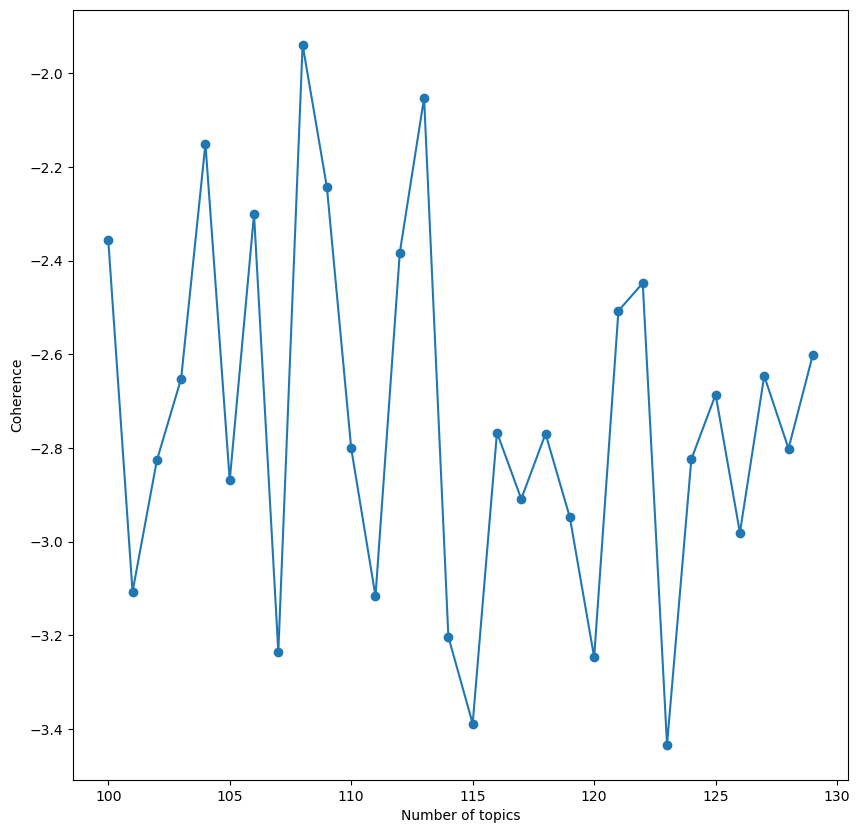

In [69]:
axisy = list(range(100,130))
plt.figure(figsize=(10,10))
plt.plot(axisy,co_val,marker = 'o')
plt.xlabel("Number of topics")
plt.ylabel("Coherence")
plt.show()